In [1]:
library(moments)  # skewness
library(corrplot)  # corrplot

In [2]:
# load the data set
data = read.csv('./train.csv')
dim(data)

[1] 1460   81

In [3]:
# compute the number of missing values in each column
num.NA = colSums(apply(data[, -c(1, 81)], 2, is.na))
data.type = sapply(data[, names(which(num.NA != 0))], class)
cbind(num.NA[num.NA > 0], data.type)

,,data.type
LotFrontage,259,integer
Alley,1369,factor
MasVnrType,8,factor
MasVnrArea,8,integer
BsmtQual,37,factor
BsmtCond,37,factor
BsmtExposure,38,factor
BsmtFinType1,37,factor
BsmtFinType2,38,factor
Electrical,1,factor


In [4]:
# drop column of Alley, PoolQC, Fence, MiscFeature
drop.names = c("Alley", "PoolQC", "Fence", "MiscFeature")
data = data[ , !(names(data) %in% drop.names)]

In [5]:
# find all categorical and numerical variables
data.type = sapply(data[ , -c(1, ncol(data))], class)
categorical.var = names(data)[which(c(NA, data.type, NA) == 'factor')]
numerical.var = names(data)[which(c(NA, data.type, NA) == 'integer')]

In [6]:
# create new feature named "NA" for categorical variables
for (i in categorical.var) {
    data[, i] = addNA(data[, i])
}

In [7]:
# create new feature using the median value for numerical variables
numerical.missing.var = c('LotFrontage', 'MasVnrArea', 'GarageYrBlt')
for (i in numerical.missing.var) {
    na.id = is.na(data[, i])
    tmp.median = median(data[, i], na.rm=TRUE)
    data[which(na.id), i] = tmp.median
    data[, paste(i, 'NAInd', sep='_')] = as.numeric(na.id)
}

### Plot of the categorical data

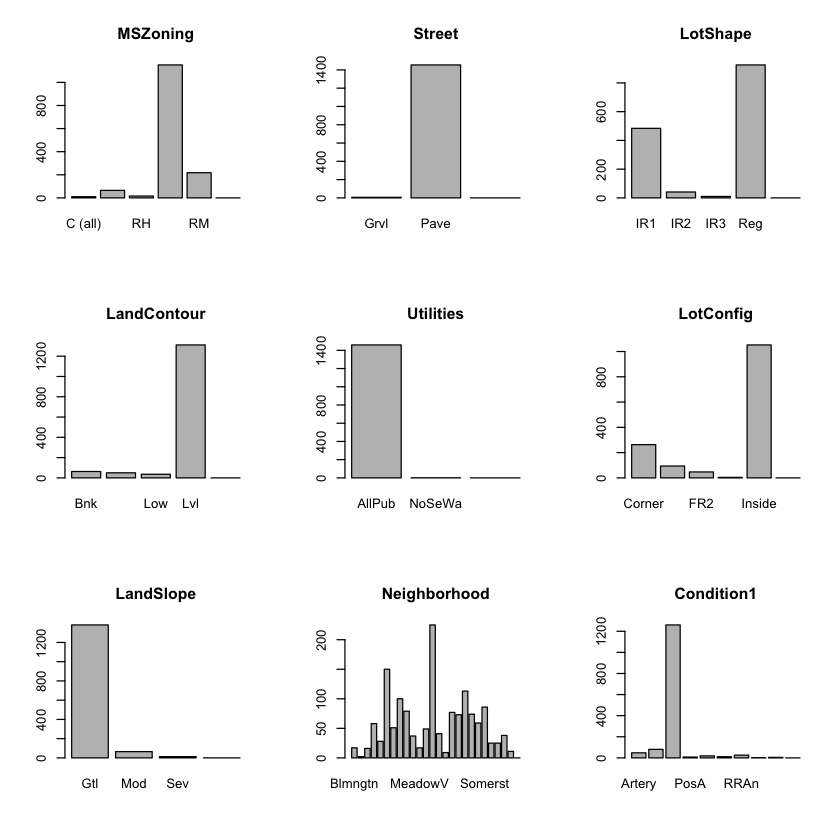

In [8]:
# plot the categorical variable distribution
par(mfrow=c(3, 3))
for (i in 1:9) {
    barplot(table(data[, categorical.var[i]]), main=categorical.var[i])
}

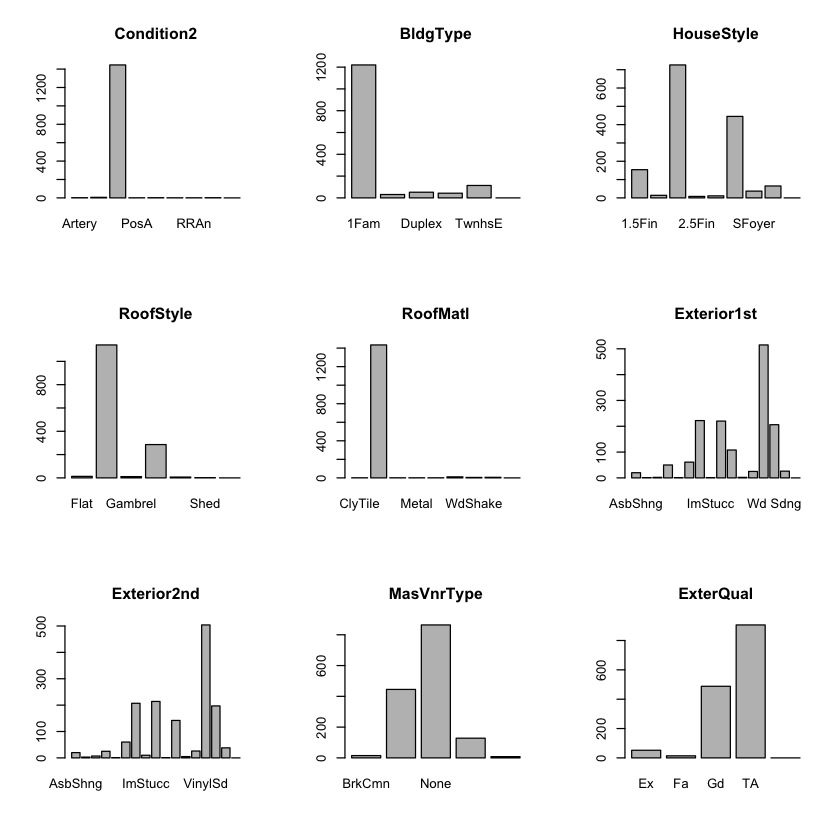

In [9]:
# plot the categorical variable distribution
par(mfrow=c(3, 3))
for (i in 10:18) {
    barplot(table(data[, categorical.var[i]]), main=categorical.var[i])
}

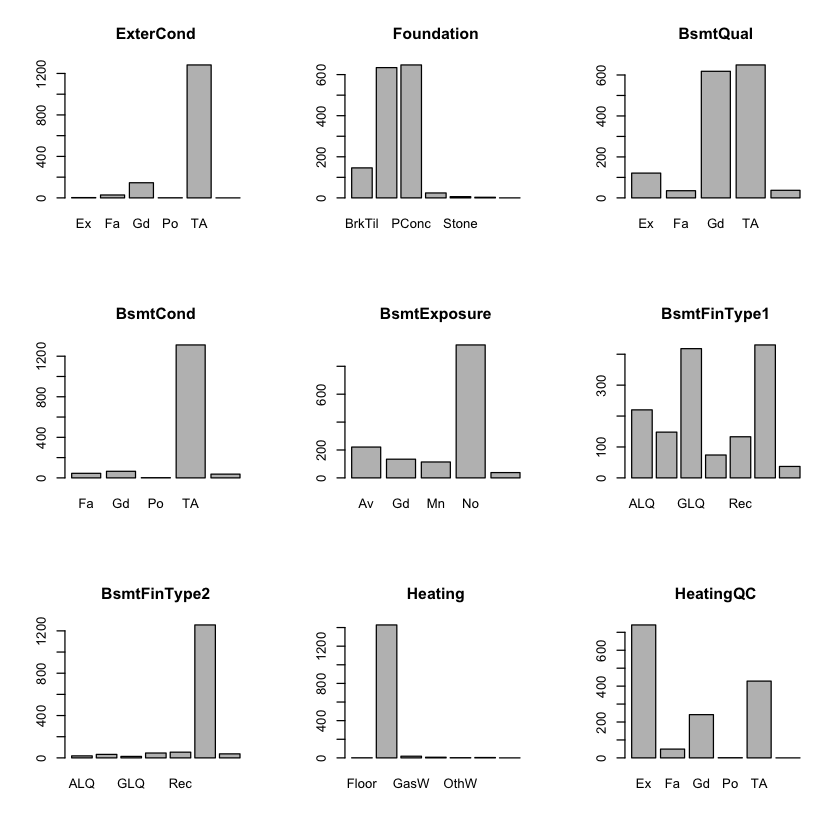

In [10]:
# plot the categorical variable distribution
par(mfrow=c(3, 3))
for (i in 19:27) {
    barplot(table(data[, categorical.var[i]]), main=categorical.var[i])
}

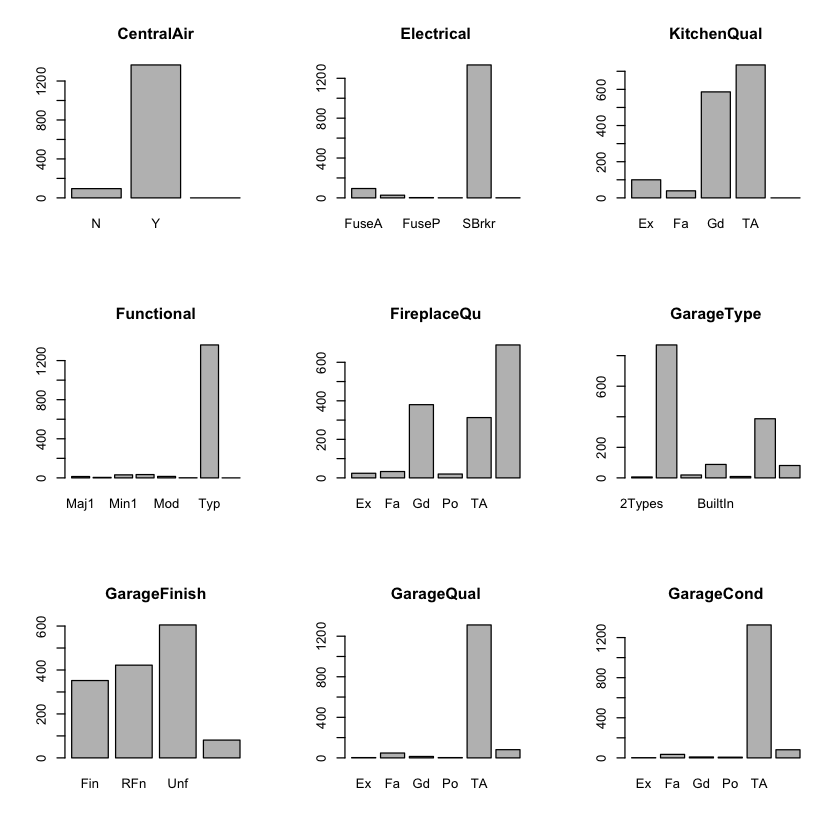

In [11]:
# plot the categorical variable distribution
par(mfrow=c(3, 3))
for (i in 28:36) {
    barplot(table(data[, categorical.var[i]]), main=categorical.var[i])
}

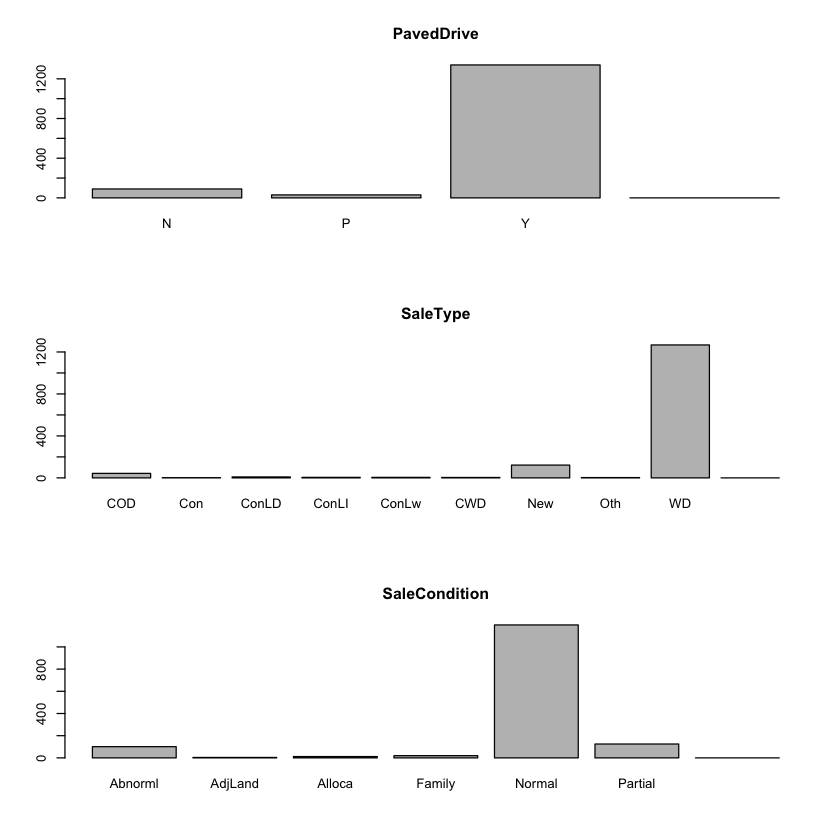

In [12]:
# plot the categorical variable distribution
par(mfrow=c(3, 1))
for (i in 37:39) {
    barplot(table(data[, categorical.var[i]]), main=categorical.var[i])
}

### Plot of numerical values

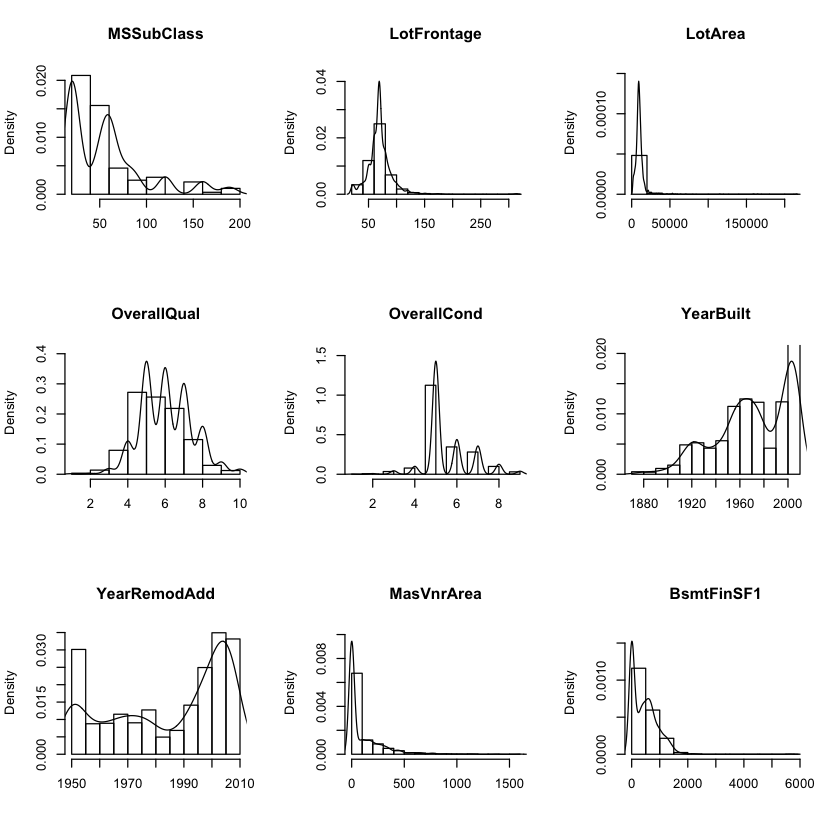

In [13]:
par(mfrow = c(3, 3))
for(i in 1:9){
    dist = density(data[, numerical.var[i]])
    hist(data[, numerical.var[i]], main=numerical.var[i], xlab='', prob=TRUE, ylim=c(0, max(dist$y) * 1.1))
    lines(dist)
}

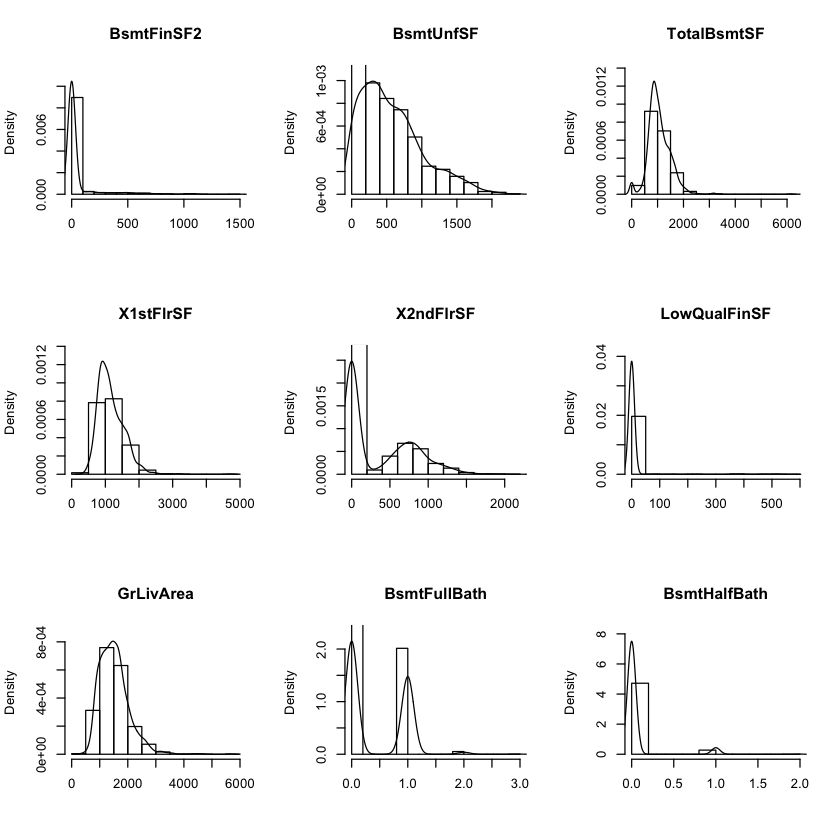

In [14]:
par(mfrow = c(3, 3))
for(i in 10:18){
    dist = density(data[, numerical.var[i]])
    hist(data[, numerical.var[i]], main=numerical.var[i], xlab='', prob=TRUE, ylim=c(0, max(dist$y) * 1.1))
    lines(dist)
}

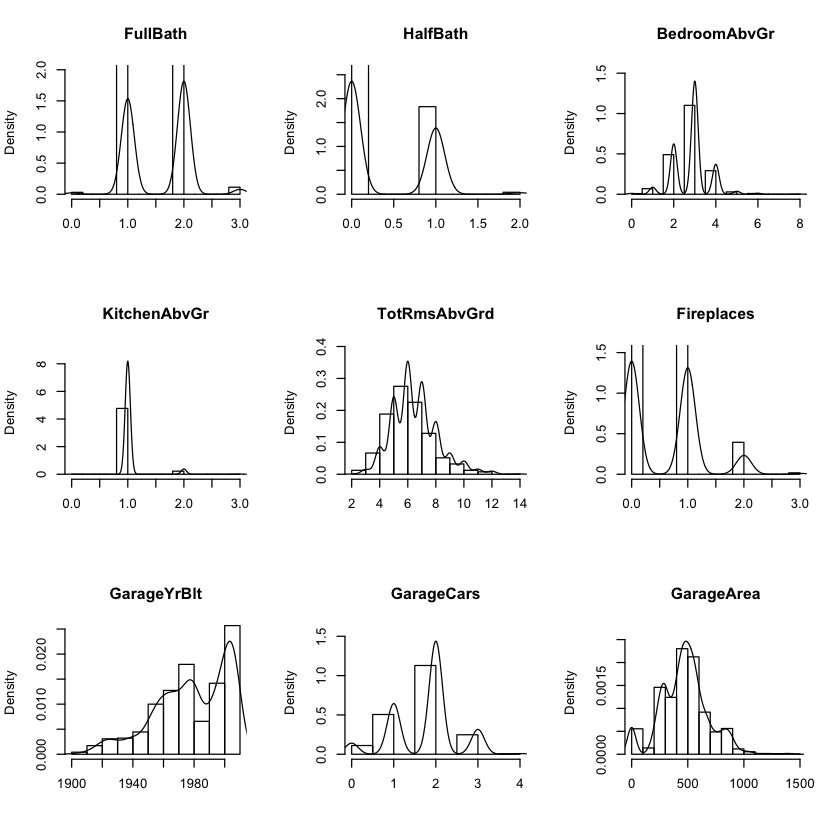

In [15]:
par(mfrow = c(3, 3))
for(i in 19:27){
    dist = density(data[, numerical.var[i]])
    hist(data[, numerical.var[i]], main=numerical.var[i], xlab='', prob=TRUE, ylim=c(0, max(dist$y) * 1.1))
    lines(dist)
}

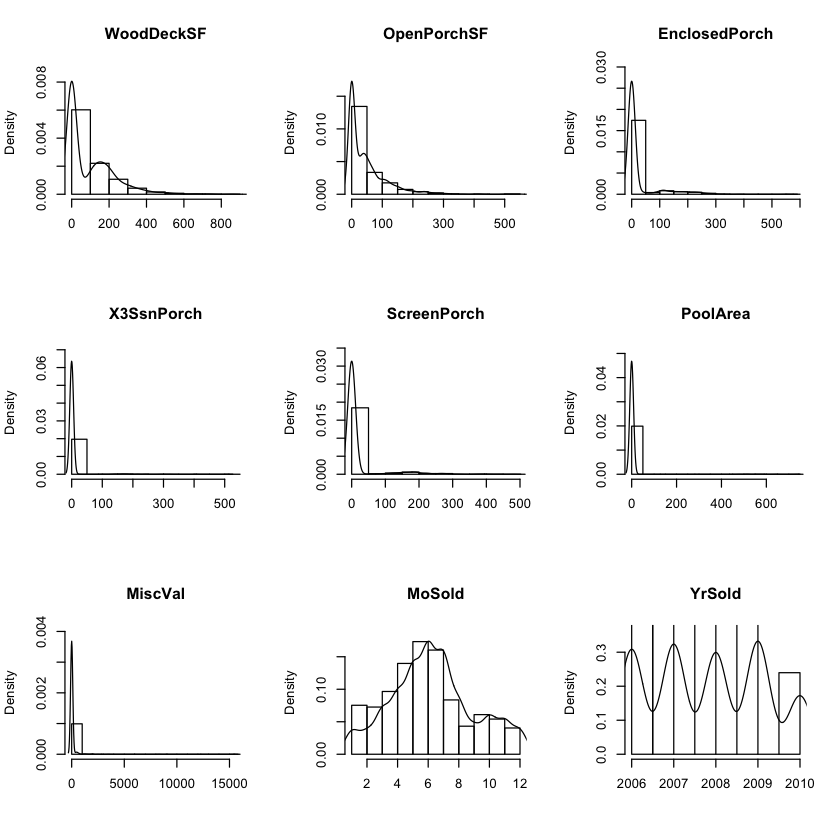

In [16]:
par(mfrow = c(3, 3))
for(i in 28:36){
    dist = density(data[, numerical.var[i]])
    hist(data[, numerical.var[i]], main=numerical.var[i], xlab='', prob=TRUE, ylim=c(0, max(dist$y) * 1.1))
    lines(dist)
}

In [17]:
# transform the response variable into log scale
data$SalePrice = log(data$SalePrice + 1)

# transform numerical feature whose skewness is larger than 0.75
skewed.features = sapply(data[, numerical.var], skewness)
skewed.features = numerical.var[which(skewed.features > 0.75)]
for (i in skewed.features) {
    data[, i] = log(data[, i] + 1)
}

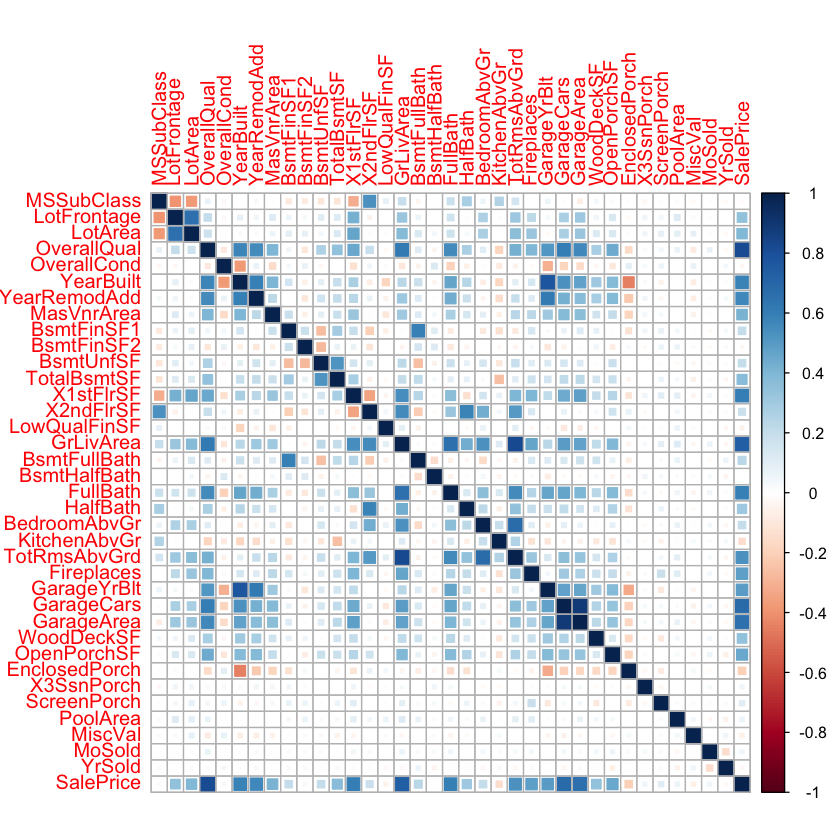

In [18]:
# explore the correlation
correlation = cor(data[, c(numerical.var, 'SalePrice')])
corrplot(correlation, method='square')

In [30]:
row_indic = apply(correlation, 1, function(x) sum(abs(x) > 0.3) > 1)
correlation = correlation[row_indic, row_indic]

In [33]:
highCor = which(abs(correlation[, ncol(correlation)]) > 0.2)
highCor = highCor[-length(highCor)]
names(highCor)

[1] "LotFrontage"   "LotArea"       "OverallQual"   "YearBuilt"    
 [5] "YearRemodAdd"  "MasVnrArea"    "BsmtFinSF1"    "BsmtUnfSF"    
 [9] "TotalBsmtSF"   "X1stFlrSF"     "GrLivArea"     "BsmtFullBath" 
[13] "FullBath"      "HalfBath"      "BedroomAbvGr"  "TotRmsAbvGrd" 
[17] "Fireplaces"    "GarageYrBlt"   "GarageCars"    "GarageArea"   
[21] "WoodDeckSF"    "OpenPorchSF"   "EnclosedPorch"